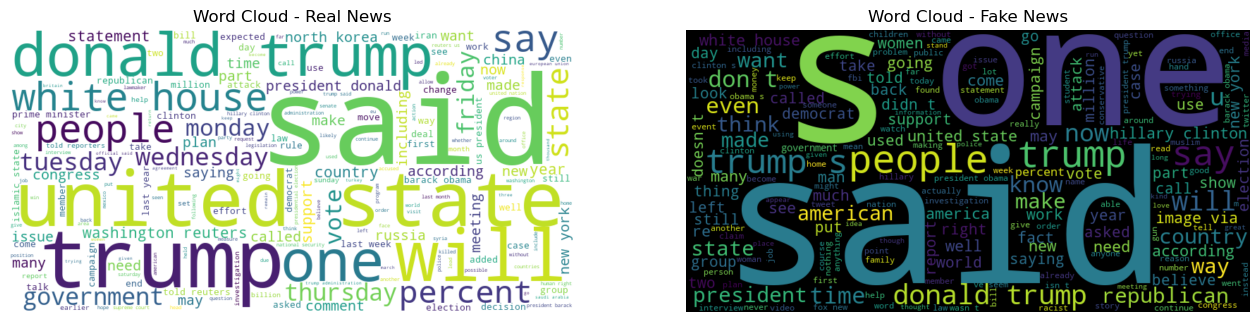

/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/s

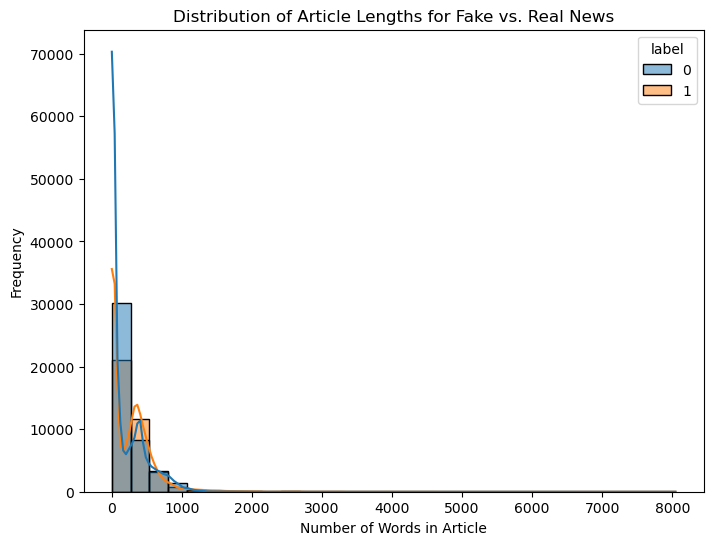

In [1]:
# Import Libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load News Dataset
news_true = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/News_dataset/True.csv')
news_fake = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/News_dataset/Fake.csv')
news_true["label"] = 0  # Real news
news_fake["label"] = 1  # Fake news
news_data = pd.concat([news_true, news_fake], ignore_index=True)
news_data["dataset"] = "News"

# Load FakeNewsNet Dataset (Merging GossipCop and PolitiFact)
gossip_fake = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/gossipcop_fake.csv')
gossip_real = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/gossipcop_real.csv')
politifact_fake = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/politifact_fake.csv')
politifact_real = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/politifact_real.csv')

gossip_fake["label"] = 1  # Fake
gossip_real["label"] = 0  # Real
politifact_fake["label"] = 1  # Fake
politifact_real["label"] = 0  # Real

fakenewsnet_data = pd.concat([gossip_fake, gossip_real, politifact_fake, politifact_real], ignore_index=True)
fakenewsnet_data["dataset"] = "FakeNewsNet"

# Load LIAR Dataset
liar_train = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/train.tsv', sep='\t', header=None)
liar_valid = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/valid.tsv', sep='\t', header=None)
liar_test = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/test.tsv', sep='\t', header=None)

# Define LIAR column names
liar_columns = ["id", "label", "statement", "subject", "speaker", "speaker_job", "state",
                "party", "barely_true", "false", "half_true", "mostly_true", "pants_on_fire", "context"]

liar_train.columns = liar_columns
liar_valid.columns = liar_columns
liar_test.columns = liar_columns

# Merge LIAR dataset
liar_data = pd.concat([liar_train, liar_valid, liar_test], ignore_index=True)
liar_data["dataset"] = "LIAR"

# Convert LIAR labels to binary
def convert_liar_labels(label):
    return 0 if label in ["true", "mostly-true"] else 1

liar_data["label"] = liar_data["label"].apply(convert_liar_labels)

# Merge All Datasets
all_data = pd.concat([
    news_data[['text', 'label', 'dataset']],
    fakenewsnet_data[['title', 'label', 'dataset']].rename(columns={"title": "text"}),
    liar_data[['statement', 'label', 'dataset']].rename(columns={"statement": "text"})
], ignore_index=True)

# Remove missing values
all_data.dropna(inplace=True)

# 📌 **Step 2: Exploratory Data Analysis (EDA)**

# Text Cleaning Function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower().strip()
    return text

# Apply Cleaning to Text Column
all_data['clean_text'] = all_data['text'].astype(str).apply(clean_text)

# Generate Word Clouds
real_text = " ".join(all_data[all_data['label'] == 0]['clean_text'])
fake_text = " ".join(all_data[all_data['label'] == 1]['clean_text'])

wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)
wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_text)

# Display Word Clouds
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].imshow(wordcloud_real, interpolation='bilinear')
axes[0].set_title("Word Cloud - Real News")
axes[0].axis('off')

axes[1].imshow(wordcloud_fake, interpolation='bilinear')
axes[1].set_title("Word Cloud - Fake News")
axes[1].axis('off')

plt.show()

# Analyze Article Lengths
all_data["text_length"] = all_data["clean_text"].apply(lambda x: len(x.split()))

# Plot Histogram of Text Lengths
plt.figure(figsize=(8, 6))
sns.histplot(data=all_data, x="text_length", hue="label", bins=30, kde=True)
plt.title("Distribution of Article Lengths for Fake vs. Real News")
plt.xlabel("Number of Words in Article")
plt.ylabel("Frequency")
plt.show()




🔍 Analyzing News Dataset...



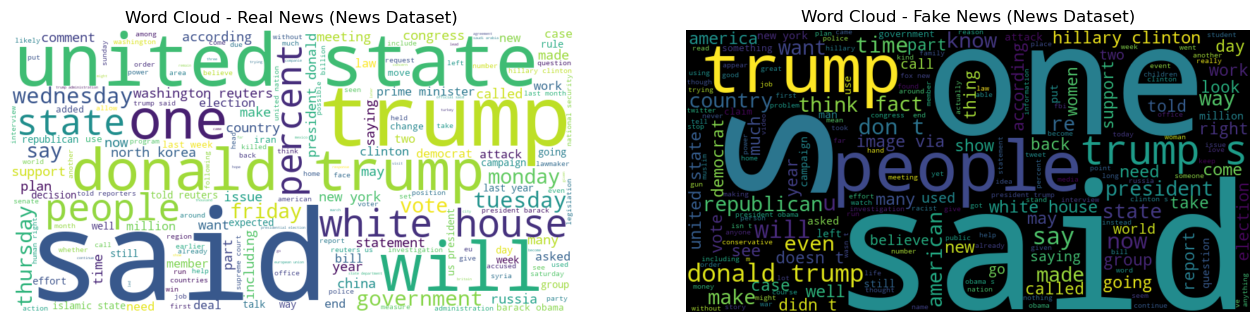

/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/s

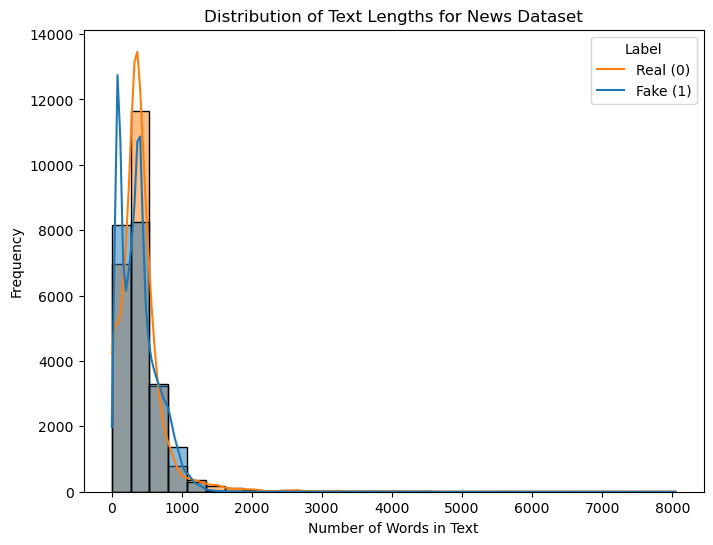

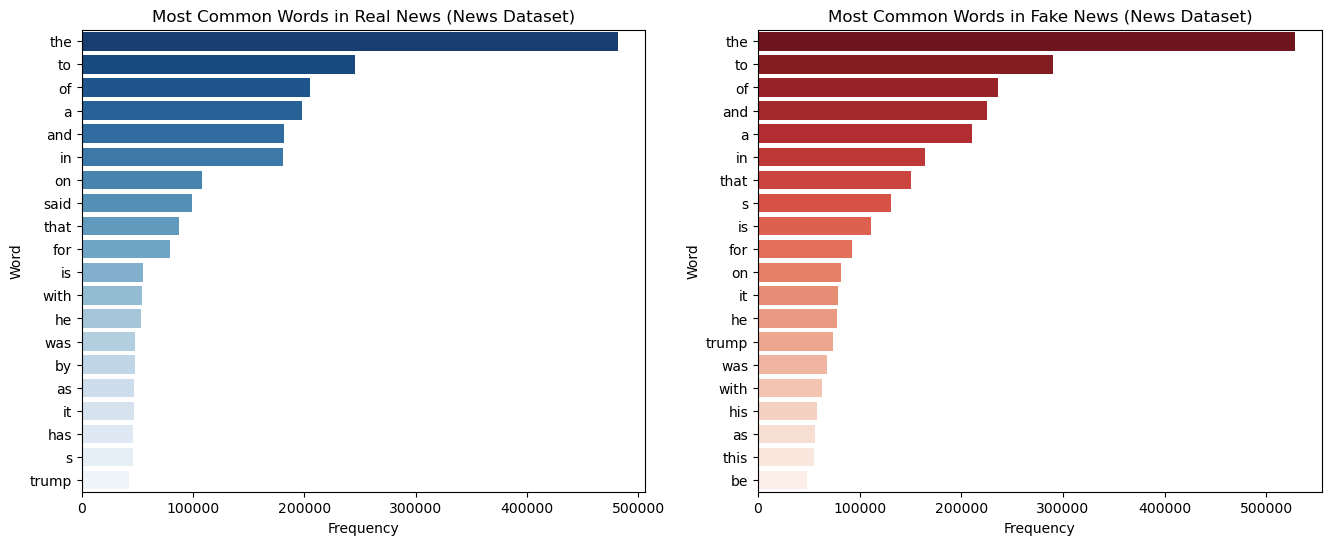


🔍 Analyzing FakeNewsNet...



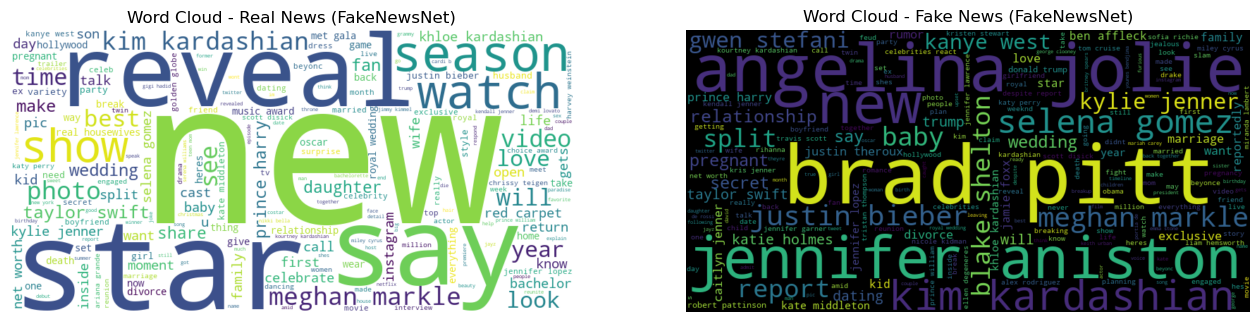

/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/s

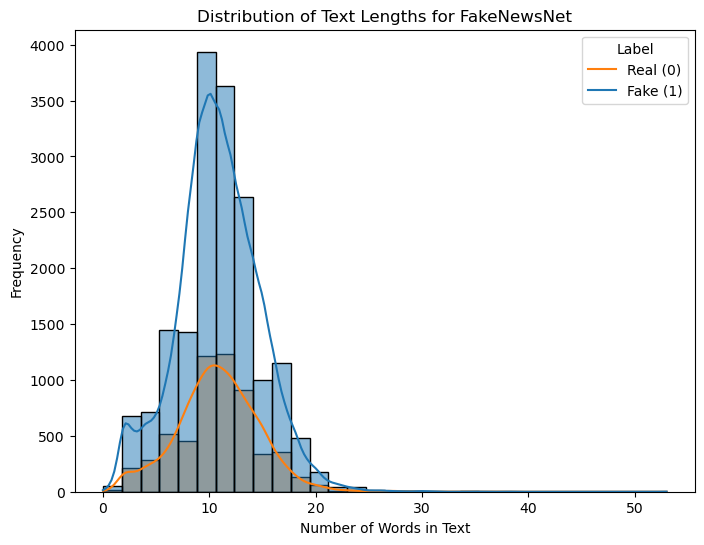

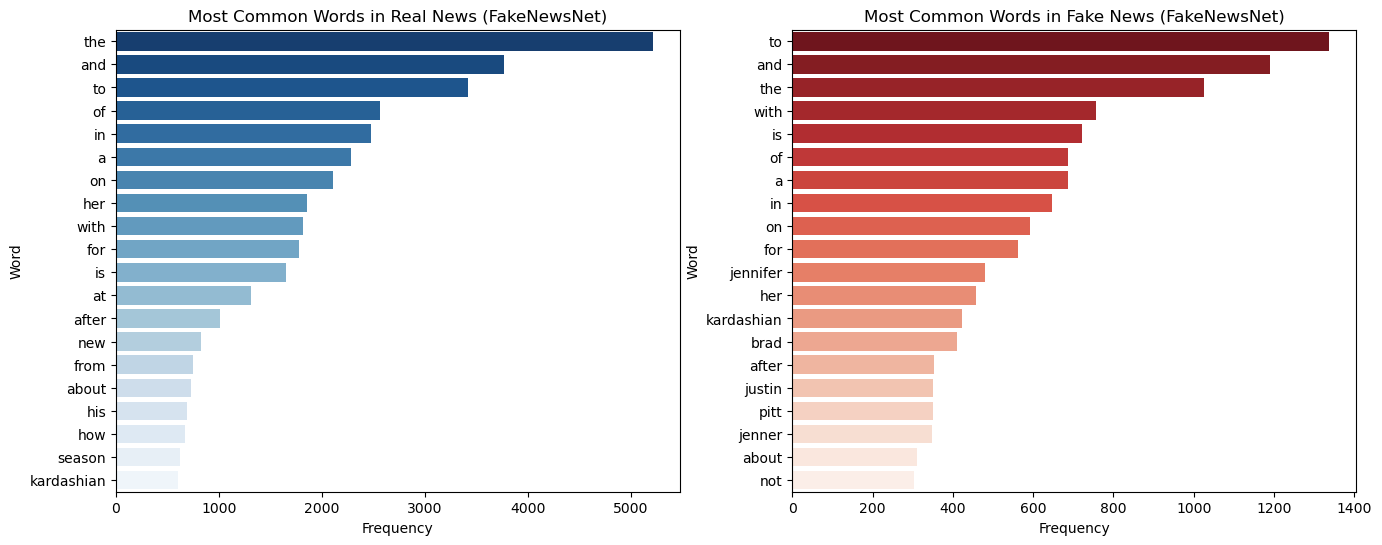


🔍 Analyzing LIAR Dataset...



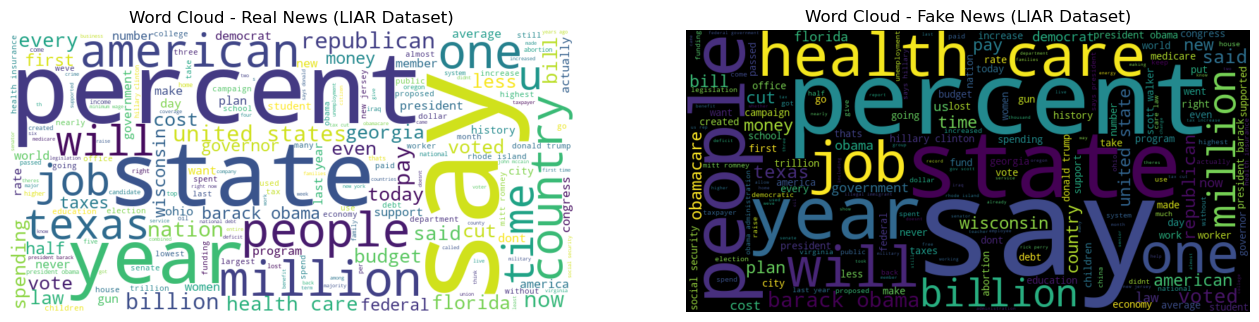

/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/s

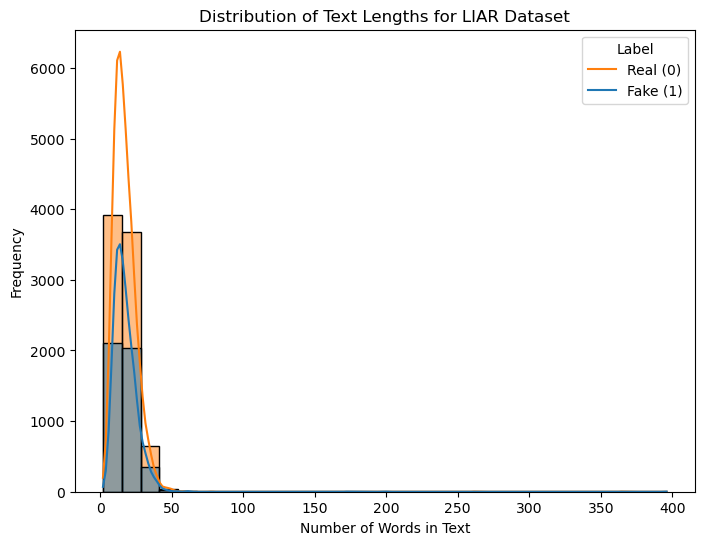

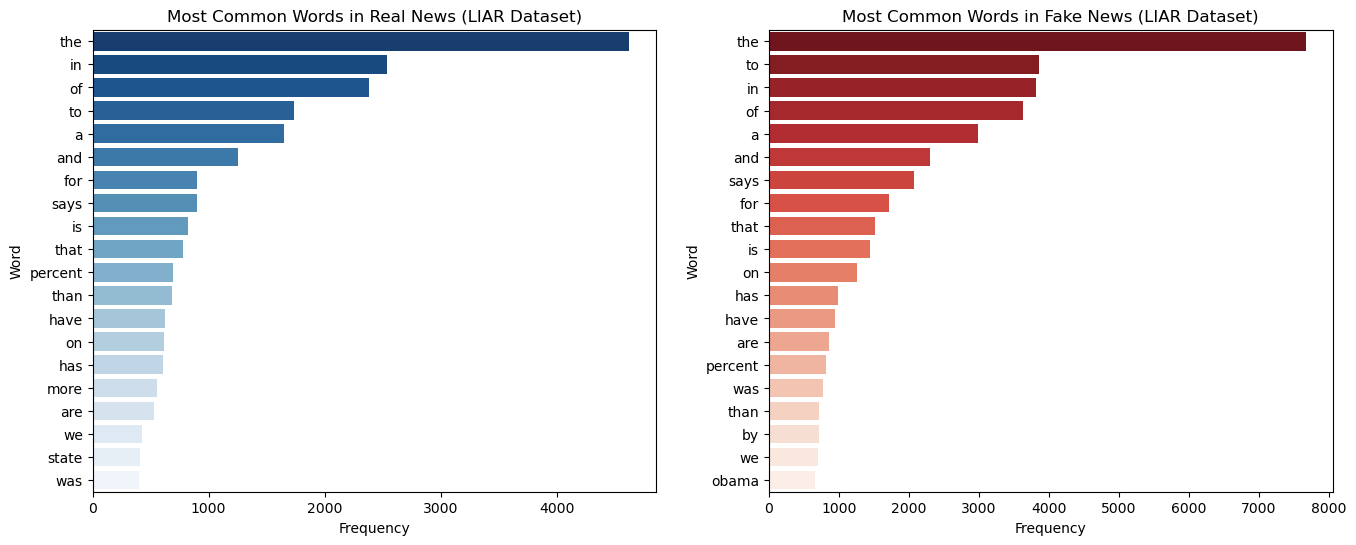


🔍 Analyzing the Combined Dataset...



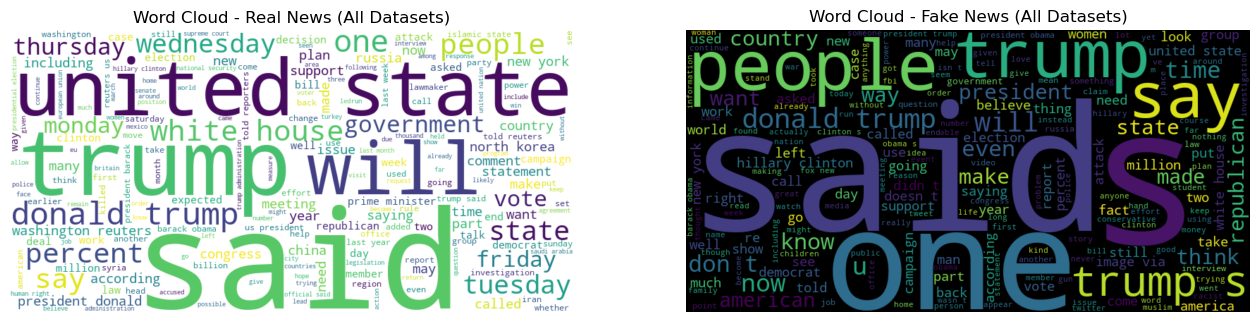

/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/s

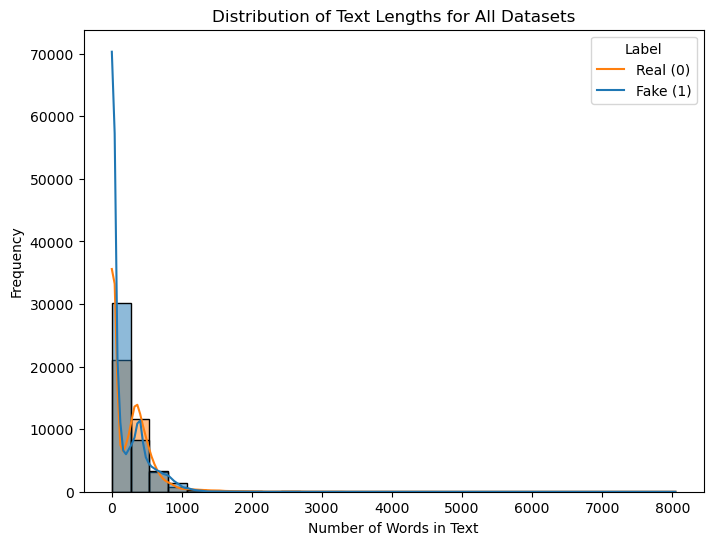

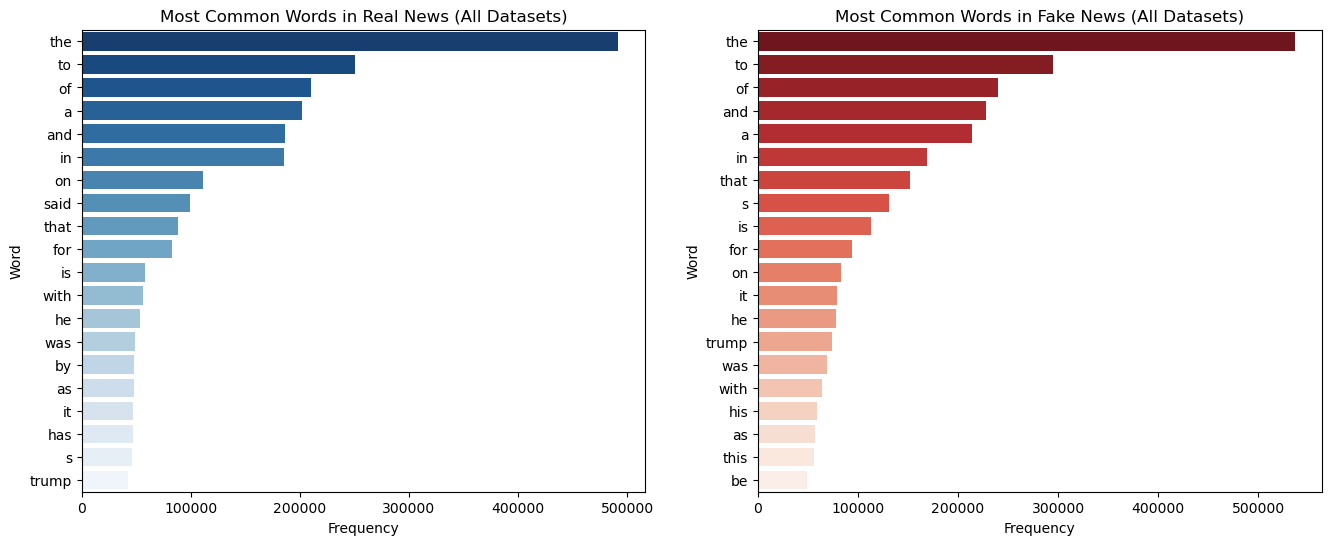

In [3]:
# Import Required Libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# 📌 Load News Dataset
news_true = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/News_dataset/True.csv')
news_fake = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/News_dataset/Fake.csv')
news_true["label"] = 0  # Real news
news_fake["label"] = 1  # Fake news
news_data = pd.concat([news_true, news_fake], ignore_index=True)
news_data["dataset"] = "News"

# 📌 Load FakeNewsNet Dataset (Merging GossipCop and PolitiFact)
gossip_fake = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/gossipcop_fake.csv')
gossip_real = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/gossipcop_real.csv')
politifact_fake = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/politifact_fake.csv')
politifact_real = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/politifact_real.csv')

gossip_fake["label"] = 1  # Fake
gossip_real["label"] = 0  # Real
politifact_fake["label"] = 1  # Fake
politifact_real["label"] = 0  # Real

fakenewsnet_data = pd.concat([gossip_fake, gossip_real, politifact_fake, politifact_real], ignore_index=True)
fakenewsnet_data["dataset"] = "FakeNewsNet"

# 📌 Load LIAR Dataset
liar_train = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/train.tsv', sep='\t', header=None)
liar_valid = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/valid.tsv', sep='\t', header=None)
liar_test = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/test.tsv', sep='\t', header=None)

# Define LIAR column names
liar_columns = ["id", "label", "statement", "subject", "speaker", "speaker_job", "state",
                "party", "barely_true", "false", "half_true", "mostly_true", "pants_on_fire", "context"]

liar_train.columns = liar_columns
liar_valid.columns = liar_columns
liar_test.columns = liar_columns

# Merge LIAR dataset
liar_data = pd.concat([liar_train, liar_valid, liar_test], ignore_index=True)
liar_data["dataset"] = "LIAR"

# Convert LIAR labels to binary
def convert_liar_labels(label):
    return 0 if label in ["true", "mostly-true"] else 1

liar_data["label"] = liar_data["label"].apply(convert_liar_labels)

# 📌 Define Text Cleaning Function
def clean_text(text):
    text = re.sub(r'http\S+', '', str(text))  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower().strip()
    return text

# Apply Cleaning to Individual Datasets Before Merging
news_data['clean_text'] = news_data['text'].apply(clean_text)
fakenewsnet_data['clean_text'] = fakenewsnet_data['title'].apply(clean_text)
liar_data['clean_text'] = liar_data['statement'].apply(clean_text)

# 📌 Merge All Datasets
all_data = pd.concat([
    news_data[['clean_text', 'label', 'dataset']],
    fakenewsnet_data[['clean_text', 'label', 'dataset']],
    liar_data[['clean_text', 'label', 'dataset']]
], ignore_index=True)

# Remove missing values
all_data.dropna(inplace=True)

# 📌 Function to generate Word Clouds
def generate_wordclouds(dataset_name, df):
    real_text = " ".join(df[df['label'] == 0]['clean_text'])
    fake_text = " ".join(df[df['label'] == 1]['clean_text'])

    wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)
    wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_text)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    axes[0].imshow(wordcloud_real, interpolation='bilinear')
    axes[0].set_title(f"Word Cloud - Real News ({dataset_name})")
    axes[0].axis('off')

    axes[1].imshow(wordcloud_fake, interpolation='bilinear')
    axes[1].set_title(f"Word Cloud - Fake News ({dataset_name})")
    axes[1].axis('off')

    plt.show()

# 📌 Function to analyze text length
def plot_text_length_distribution(dataset_name, df):
    df["text_length"] = df["clean_text"].apply(lambda x: len(x.split()))

    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x="text_length", hue="label", bins=30, kde=True)
    plt.title(f"Distribution of Text Lengths for {dataset_name}")
    plt.xlabel("Number of Words in Text")
    plt.ylabel("Frequency")
    plt.legend(title="Label", labels=["Real (0)", "Fake (1)"])
    plt.show()

# 📌 Function to find most common words
def plot_common_words(dataset_name, df, n=20):
    real_words = " ".join(df[df['label'] == 0]['clean_text']).split()
    fake_words = " ".join(df[df['label'] == 1]['clean_text']).split()

    real_common_words = Counter(real_words).most_common(n)
    fake_common_words = Counter(fake_words).most_common(n)

    real_words_df = pd.DataFrame(real_common_words, columns=["Word", "Frequency"])
    fake_words_df = pd.DataFrame(fake_common_words, columns=["Word", "Frequency"])

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    sns.barplot(y="Word", x="Frequency", data=real_words_df, ax=axes[0], palette="Blues_r")
    axes[0].set_title(f"Most Common Words in Real News ({dataset_name})")

    sns.barplot(y="Word", x="Frequency", data=fake_words_df, ax=axes[1], palette="Reds_r")
    axes[1].set_title(f"Most Common Words in Fake News ({dataset_name})")

    plt.show()

# 📌 Analyze each dataset individually
datasets = {
    "News Dataset": news_data,
    "FakeNewsNet": fakenewsnet_data,
    "LIAR Dataset": liar_data
}

for dataset_name, df in datasets.items():
    print(f"\n🔍 Analyzing {dataset_name}...\n")
    generate_wordclouds(dataset_name, df)
    plot_text_length_distribution(dataset_name, df)
    plot_common_words(dataset_name, df)

# 📌 Combined Dataset Analysis
print("\n🔍 Analyzing the Combined Dataset...\n")
generate_wordclouds("All Datasets", all_data)
plot_text_length_distribution("All Datasets", all_data)
plot_common_words("All Datasets", all_data)



📊 Dataset Summary:
               Total Samples  Real News Count  Fake News Count  \
News Dataset        44898.0          21417.0          23481.0   
FakeNewsNet         23196.0          17441.0           5755.0   
LIAR Dataset        12791.0           4507.0           8284.0   

              Average Text Length  Median Text Length  Max Text Length  \
News Dataset            12.453472                11.0             42.0   
FakeNewsNet              1.000000                 1.0              1.0   
LIAR Dataset             1.000000                 1.0              1.0   

              Min Text Length  
News Dataset              1.0  
FakeNewsNet               1.0  
LIAR Dataset              1.0  

✅ Sentiment Analysis Completed

✅ Named Entity Recognition Completed

✅ TF-IDF Feature Extraction Completed


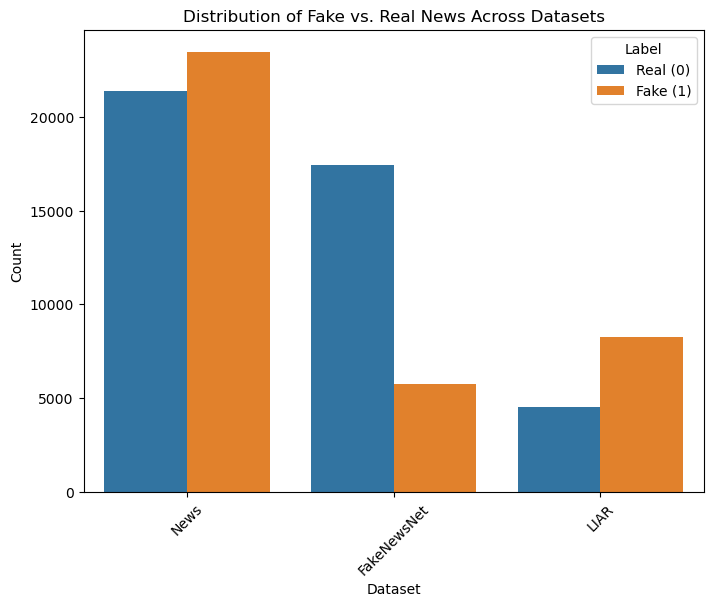

In [10]:
# Import Required Libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# 📌 Load Datasets
def load_datasets():
    # News Dataset
    news_true = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/News_dataset/True.csv')
    news_fake = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/News_dataset/Fake.csv')
    news_true["label"] = 0  # Real news
    news_fake["label"] = 1  # Fake news
    news_data = pd.concat([news_true, news_fake], ignore_index=True)
    news_data["dataset"] = "News"

    # FakeNewsNet Dataset (GossipCop + PolitiFact)
    gossip_fake = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/gossipcop_fake.csv')
    gossip_real = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/gossipcop_real.csv')
    politifact_fake = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/politifact_fake.csv')
    politifact_real = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/politifact_real.csv')

    gossip_fake["label"] = 1  # Fake
    gossip_real["label"] = 0  # Real
    politifact_fake["label"] = 1  # Fake
    politifact_real["label"] = 0  # Real

    fakenewsnet_data = pd.concat([gossip_fake, gossip_real, politifact_fake, politifact_real], ignore_index=True)
    fakenewsnet_data["dataset"] = "FakeNewsNet"

    # LIAR Dataset
    liar_train = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/train.tsv', sep='\t', header=None)
    liar_valid = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/valid.tsv', sep='\t', header=None)
    liar_test = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/test.tsv', sep='\t', header=None)

    # Define column names for LIAR dataset
    liar_columns = ["id", "label", "statement", "subject", "speaker", "speaker_job", "state",
                    "party", "barely_true", "false", "half_true", "mostly_true", "pants_on_fire", "context"]

    liar_train.columns = liar_columns
    liar_valid.columns = liar_columns
    liar_test.columns = liar_columns

    # Merge LIAR dataset
    liar_data = pd.concat([liar_train, liar_valid, liar_test], ignore_index=True)
    liar_data["dataset"] = "LIAR"

    # Convert LIAR labels to binary
    def convert_liar_labels(label):
        return 0 if label in ["true", "mostly-true"] else 1

    liar_data["label"] = liar_data["label"].apply(convert_liar_labels)

    return news_data, fakenewsnet_data, liar_data

# Load datasets
news_data, fakenewsnet_data, liar_data = load_datasets()

# Merge all datasets
all_data = pd.concat([
    news_data[['text', 'label', 'dataset']],
    fakenewsnet_data[['title', 'label', 'dataset']].rename(columns={"title": "text"}),
    liar_data[['statement', 'label', 'dataset']].rename(columns={"statement": "text"})
], ignore_index=True)

# Remove missing values
all_data.dropna(inplace=True)

# 📌 Function to Clean Text
def clean_text(text):
    text = re.sub(r'http\S+', '', str(text))  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower().strip()
    return text

# Apply Cleaning to Text Column
all_data['clean_text'] = all_data['text'].apply(clean_text)

# 📌 Generate Statistical Summary
dataset_summaries = {}
for dataset_name, df in {"News Dataset": news_data, "FakeNewsNet": fakenewsnet_data, "LIAR Dataset": liar_data}.items():
    summary = {
        "Total Samples": len(df),
        "Real News Count": (df['label'] == 0).sum(),
        "Fake News Count": (df['label'] == 1).sum(),
        "Average Text Length": df[df.columns[0]].astype(str).apply(lambda x: len(x.split())).mean(),
        "Median Text Length": df[df.columns[0]].astype(str).apply(lambda x: len(x.split())).median(),
        "Max Text Length": df[df.columns[0]].astype(str).apply(lambda x: len(x.split())).max(),
        "Min Text Length": df[df.columns[0]].astype(str).apply(lambda x: len(x.split())).min()
    }
    dataset_summaries[dataset_name] = summary

# Convert to DataFrame for display
dataset_summary_df = pd.DataFrame(dataset_summaries).T
print("\n📊 Dataset Summary:\n", dataset_summary_df)

# 📌 Sentiment Analysis using VADER
analyzer = SentimentIntensityAnalyzer()
all_data["sentiment_score"] = all_data["clean_text"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
print("\n✅ Sentiment Analysis Completed")

# 📌 Named Entity Recognition (NER) using spaCy
nlp = spacy.load("en_core_web_sm")
def extract_named_entities(text):
    doc = nlp(text)
    return [ent.label_ for ent in doc.ents]

all_data["named_entities"] = all_data["clean_text"].apply(extract_named_entities)
print("\n✅ Named Entity Recognition Completed")

# 📌 TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(all_data['clean_text'])
print("\n✅ TF-IDF Feature Extraction Completed")
all_data['label'] = all_data['label'].astype(str)
# 📌 Visualizing Data Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=all_data, x='dataset', hue='label')
plt.title("Distribution of Fake vs. Real News Across Datasets")
plt.xlabel("Dataset")
plt.ylabel("Count")
plt.legend(title="Label", labels=["Real (0)", "Fake (1)"])
plt.xticks(rotation=45)
plt.show()



🔍 Analyzing News Dataset...



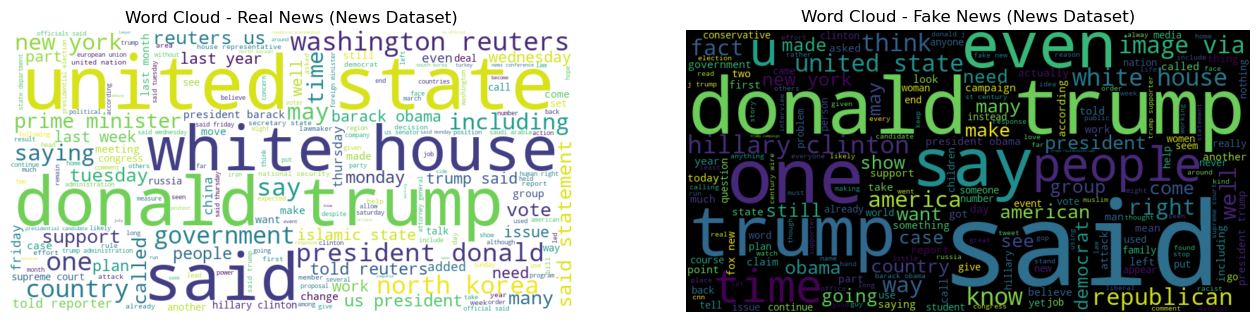

/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/s

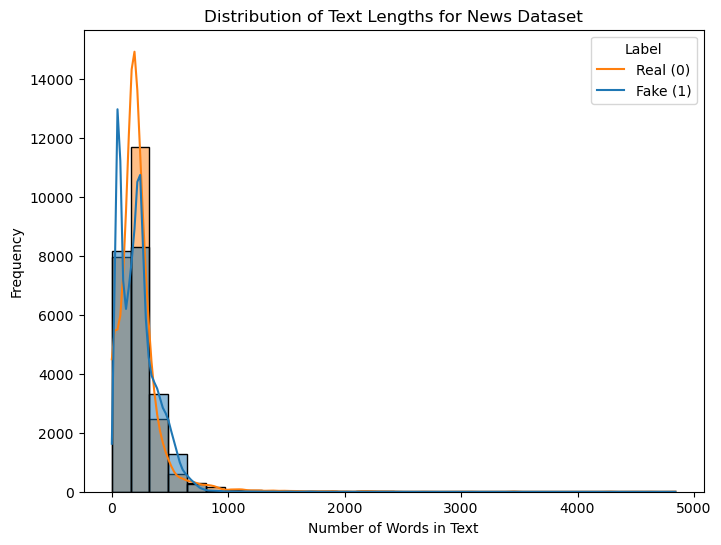

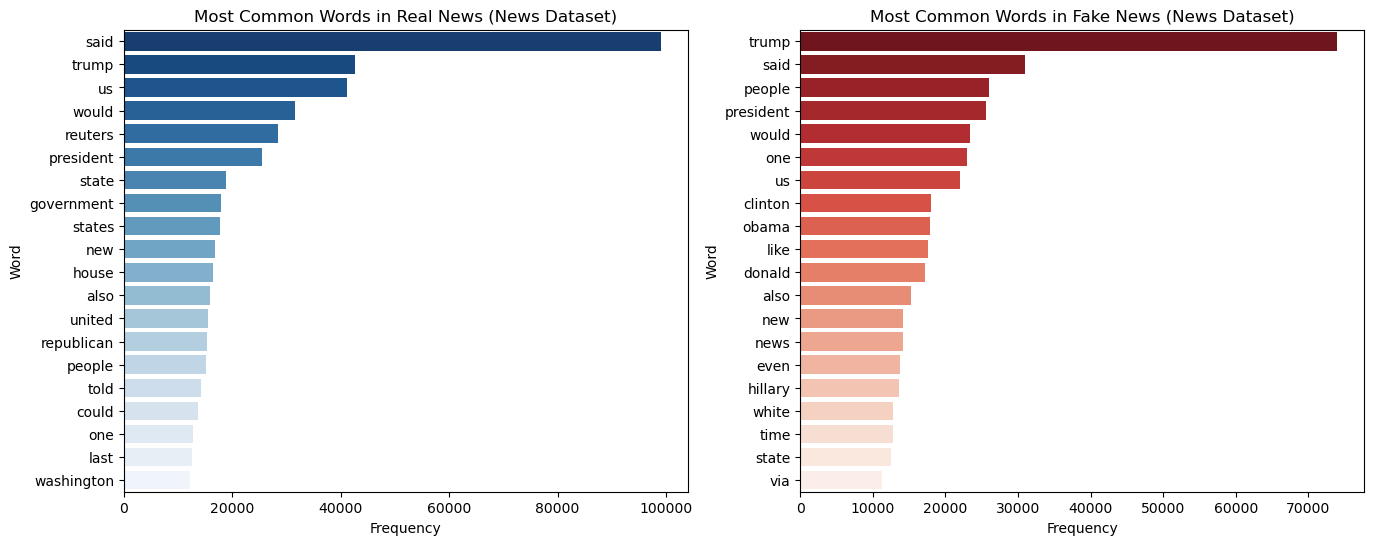


🔍 Analyzing FakeNewsNet...



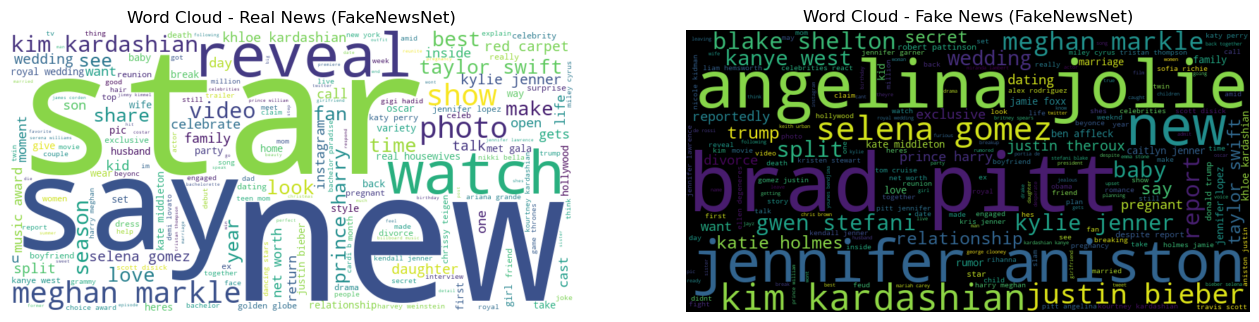

/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/s

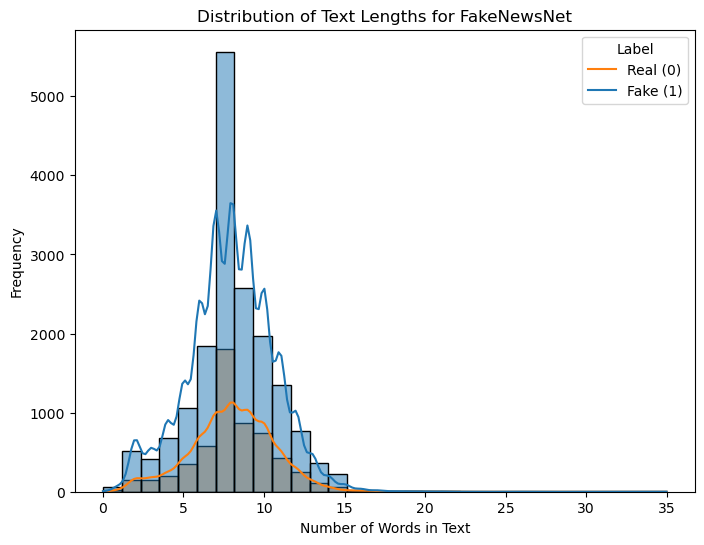

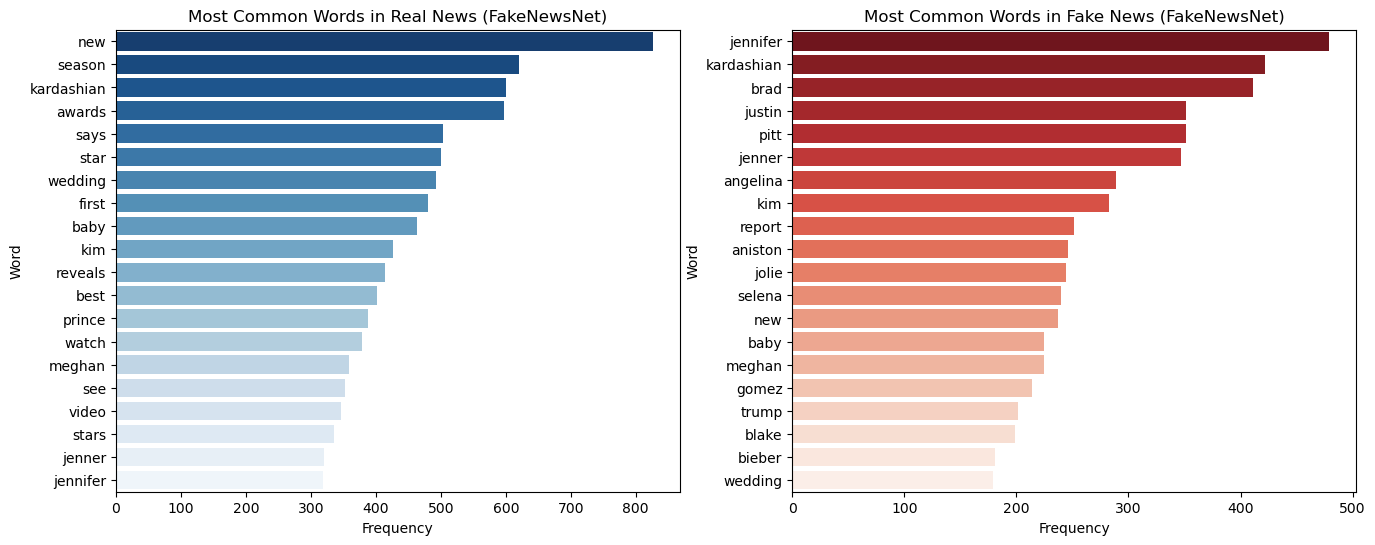


🔍 Analyzing LIAR Dataset...



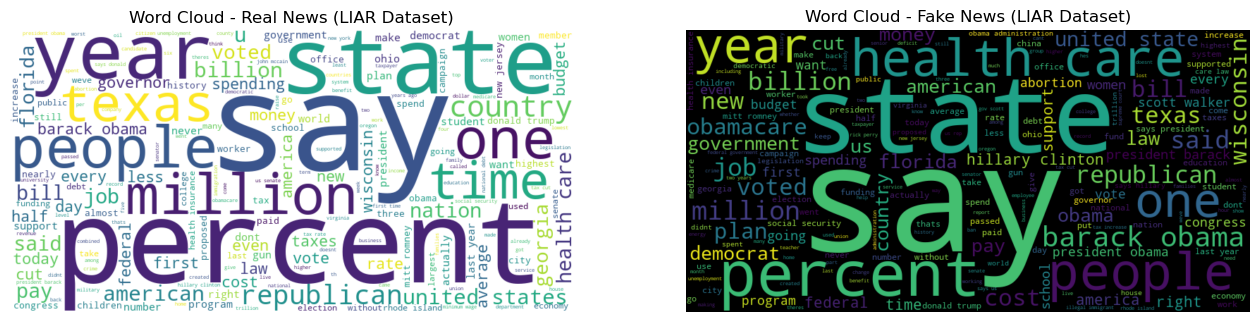

/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/s

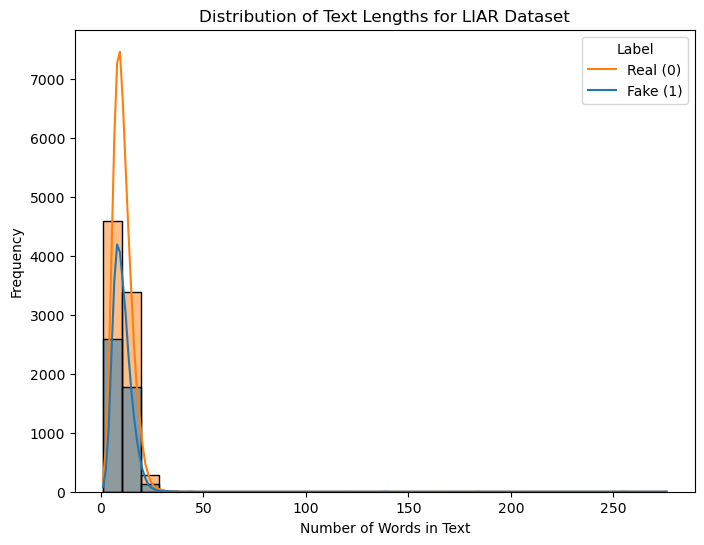

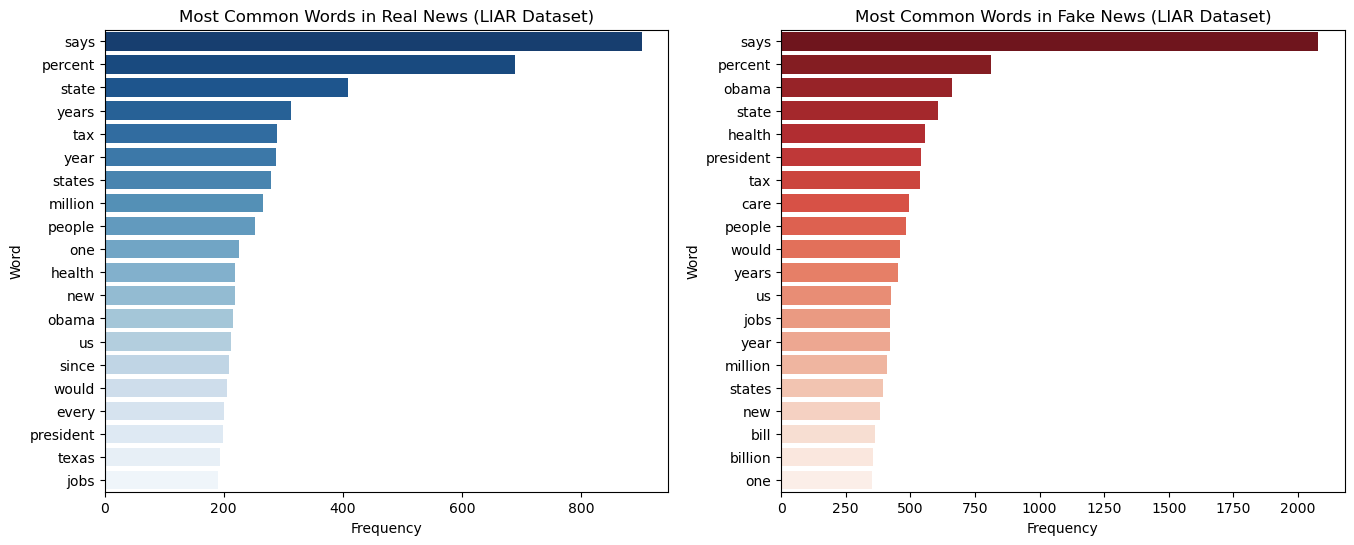


🔍 Analyzing the Combined Dataset...



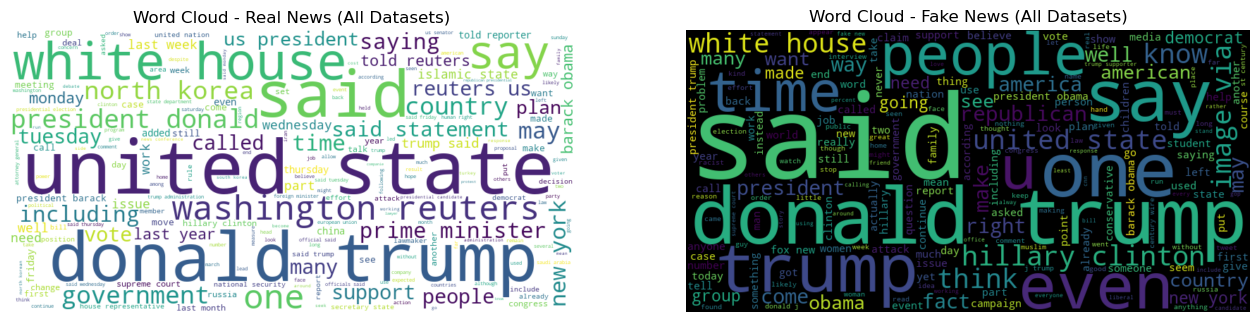

/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/aul/homes/msidd040/anaconda3/lib/python3.11/site-packages/s

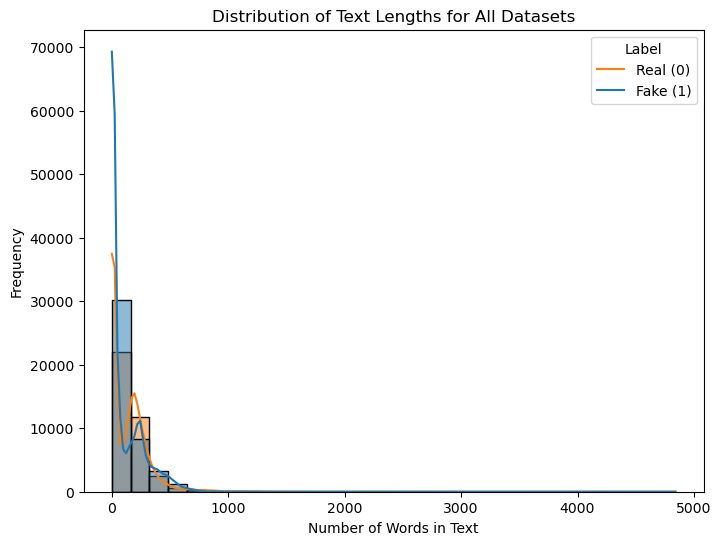

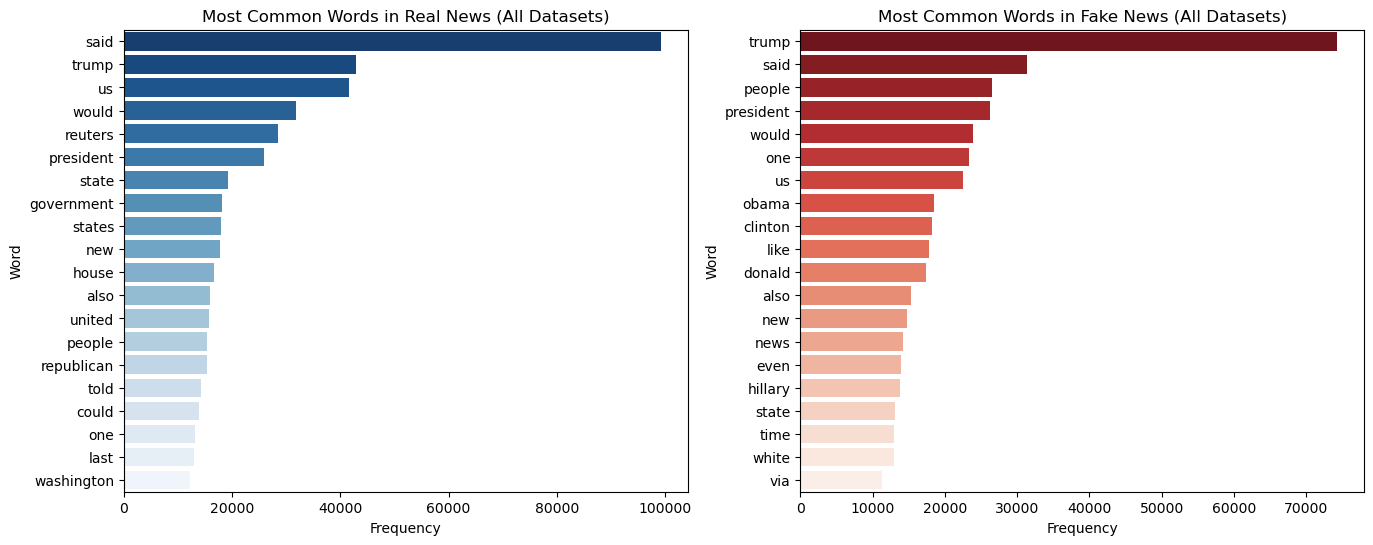

In [9]:
# Import Required Libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer


stop_words = set(stopwords.words('english'))

# 📌 Load News Dataset
news_true = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/News_dataset/True.csv')
news_fake = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/News_dataset/Fake.csv')
news_true["label"] = 0  # Real news
news_fake["label"] = 1  # Fake news
news_data = pd.concat([news_true, news_fake], ignore_index=True)
news_data["dataset"] = "News"

# 📌 Load FakeNewsNet Dataset (Merging GossipCop and PolitiFact)
gossip_fake = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/gossipcop_fake.csv')
gossip_real = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/gossipcop_real.csv')
politifact_fake = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/politifact_fake.csv')
politifact_real = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/politifact_real.csv')

gossip_fake["label"] = 1  # Fake
gossip_real["label"] = 0  # Real
politifact_fake["label"] = 1  # Fake
politifact_real["label"] = 0  # Real

fakenewsnet_data = pd.concat([gossip_fake, gossip_real, politifact_fake, politifact_real], ignore_index=True)
fakenewsnet_data["dataset"] = "FakeNewsNet"

# 📌 Load LIAR Dataset
liar_train = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/train.tsv', sep='\t', header=None)
liar_valid = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/valid.tsv', sep='\t', header=None)
liar_test = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/test.tsv', sep='\t', header=None)

# Define LIAR column names
liar_columns = ["id", "label", "statement", "subject", "speaker", "speaker_job", "state",
                "party", "barely_true", "false", "half_true", "mostly_true", "pants_on_fire", "context"]

liar_train.columns = liar_columns
liar_valid.columns = liar_columns
liar_test.columns = liar_columns

# Merge LIAR dataset
liar_data = pd.concat([liar_train, liar_valid, liar_test], ignore_index=True)
liar_data["dataset"] = "LIAR"

# Convert LIAR labels to binary
def convert_liar_labels(label):
    return 0 if label in ["true", "mostly-true"] else 1

liar_data["label"] = liar_data["label"].apply(convert_liar_labels)

# 📌 Define Text Cleaning Function
def clean_text(text):
    text = re.sub(r'http\S+', '', str(text))  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower().strip()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply Cleaning to Individual Datasets Before Merging
news_data['clean_text'] = news_data['text'].apply(clean_text)
fakenewsnet_data['clean_text'] = fakenewsnet_data['title'].apply(clean_text)
liar_data['clean_text'] = liar_data['statement'].apply(clean_text)

# 📌 Merge All Datasets
all_data = pd.concat([
    news_data[['clean_text', 'label', 'dataset']],
    fakenewsnet_data[['clean_text', 'label', 'dataset']],
    liar_data[['clean_text', 'label', 'dataset']]
], ignore_index=True)

# Remove missing values
all_data.dropna(inplace=True)

# 📌 Function to generate Word Clouds
def generate_wordclouds(dataset_name, df):
    real_text = " ".join(df[df['label'] == 0]['clean_text'])
    fake_text = " ".join(df[df['label'] == 1]['clean_text'])

    wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)
    wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_text)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    axes[0].imshow(wordcloud_real, interpolation='bilinear')
    axes[0].set_title(f"Word Cloud - Real News ({dataset_name})")
    axes[0].axis('off')

    axes[1].imshow(wordcloud_fake, interpolation='bilinear')
    axes[1].set_title(f"Word Cloud - Fake News ({dataset_name})")
    axes[1].axis('off')

    plt.show()

# 📌 Function to analyze text length
def plot_text_length_distribution(dataset_name, df):
    df["text_length"] = df["clean_text"].apply(lambda x: len(x.split()))

    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x="text_length", hue="label", bins=30, kde=True)
    plt.title(f"Distribution of Text Lengths for {dataset_name}")
    plt.xlabel("Number of Words in Text")
    plt.ylabel("Frequency")
    plt.legend(title="Label", labels=["Real (0)", "Fake (1)"])
    plt.show()

# 📌 Function to find most common words
def plot_common_words(dataset_name, df, n=20):
    real_words = " ".join(df[df['label'] == 0]['clean_text']).split()
    fake_words = " ".join(df[df['label'] == 1]['clean_text']).split()

    real_common_words = Counter(real_words).most_common(n)
    fake_common_words = Counter(fake_words).most_common(n)

    real_words_df = pd.DataFrame(real_common_words, columns=["Word", "Frequency"])
    fake_words_df = pd.DataFrame(fake_common_words, columns=["Word", "Frequency"])

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    sns.barplot(y="Word", x="Frequency", data=real_words_df, ax=axes[0], palette="Blues_r")
    axes[0].set_title(f"Most Common Words in Real News ({dataset_name})")

    sns.barplot(y="Word", x="Frequency", data=fake_words_df, ax=axes[1], palette="Reds_r")
    axes[1].set_title(f"Most Common Words in Fake News ({dataset_name})")

    plt.show()

# 📌 Analyze each dataset individually
datasets = {
    "News Dataset": news_data,
    "FakeNewsNet": fakenewsnet_data,
    "LIAR Dataset": liar_data
}

for dataset_name, df in datasets.items():
    print(f"\n🔍 Analyzing {dataset_name}...\n")
    generate_wordclouds(dataset_name, df)
    plot_text_length_distribution(dataset_name, df)
    plot_common_words(dataset_name, df)

# 📌 Combined Dataset Analysis
print("\n🔍 Analyzing the Combined Dataset...\n")
generate_wordclouds("All Datasets", all_data)
plot_text_length_distribution("All Datasets", all_data)
plot_common_words("All Datasets", all_data)


In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /aul/homes/msidd040/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
import pandas as pd
news_true = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/News_dataset/True.csv')
news_true.sample(2)

title  \
1722   Key Republican senator doubts 15 percent corpo...   
18765  Cameroon Anglophone regions to shut Nigeria bo...   

                                                    text       subject  \
1722   WASHINGTON (Reuters) - The head of the Senate ...  politicsNews   
18765  YAOUNDE (Reuters) - The government of one of C...     worldnews   

                      date  
1722   September 15, 2017   
18765  September 28, 2017

In [3]:
print(len(news_true))

21417


In [6]:
from nltk.corpus import stopwords

#### All the merged data

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# 📌 Load News Dataset
news_true = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/News_dataset/True.csv')
news_fake = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/News_dataset/Fake.csv')
news_true["label"] = 0  # Real news
news_fake["label"] = 1  # Fake news
news_data = pd.concat([news_true, news_fake], ignore_index=True)
news_data["dataset"] = "ISOT Fake News Dataset"

# 📌 Load FakeNewsNet Dataset (Merging GossipCop and PolitiFact)
gossip_fake = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/gossipcop_fake.csv')
gossip_real = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/gossipcop_real.csv')
politifact_fake = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/politifact_fake.csv')
politifact_real = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/politifact_real.csv')

gossip_fake["label"] = 1  # Fake
gossip_real["label"] = 0  # Real
politifact_fake["label"] = 1  # Fake
politifact_real["label"] = 0  # Real

fakenewsnet_data = pd.concat([gossip_fake, gossip_real, politifact_fake, politifact_real], ignore_index=True)
fakenewsnet_data["dataset"] = "FakeNewsNet"

# 📌 Load LIAR Dataset (Ensure Proper Column Assignment)
liar_columns = ["id", "label", "statement", "subject", "speaker", "speaker_job", "state",
                "party", "barely_true", "false", "half_true", "mostly_true", "pants_on_fire", "context"]

liar_train = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/train.tsv', sep='\t', header=None, names=liar_columns)
liar_valid = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/valid.tsv', sep='\t', header=None, names=liar_columns)
liar_test = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/test.tsv', sep='\t', header=None, names=liar_columns)

# Merge LIAR dataset
liar_data = pd.concat([liar_train, liar_valid, liar_test], ignore_index=True)
liar_data["dataset"] = "LIAR"

# Convert LIAR labels to binary (1 = Fake, 0 = Real)
def convert_liar_labels(label):
    return 0 if label in ["true", "mostly-true"] else 1

liar_data["label"] = liar_data["label"].apply(convert_liar_labels)

# 📌 Define Text Cleaning Function
def clean_text(text):
    text = re.sub(r'http\S+', '', str(text))  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower().strip()
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])  # Remove stopwords
    return text

# Apply text cleaning to datasets
news_data['clean_text'] = news_data['text'].apply(clean_text)
fakenewsnet_data['clean_text'] = fakenewsnet_data['title'].apply(clean_text)
liar_data['clean_text'] = liar_data['statement'].apply(clean_text)

# 📌 Merge All Cleaned Datasets
all_data = pd.concat([
    news_data[['clean_text', 'label', 'dataset']],
    fakenewsnet_data[['clean_text', 'label', 'dataset']],
    liar_data[['clean_text', 'label', 'dataset']]
], ignore_index=True)

# Remove duplicates and handle missing values
all_data.drop_duplicates(inplace=True)
all_data.dropna(inplace=True)

# Save cleaned dataset for further analysis
all_data.to_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/cleaned_news_data.csv', index=False)

print("\n✅ Cleaned dataset saved successfully!")
print(all_data.info())


In [10]:
import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# 📌 Load News Dataset
news_true = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/News_dataset/True.csv')
news_fake = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/News_dataset/Fake.csv')
news_true["label"] = 0  # Real news
news_fake["label"] = 1  # Fake news
news_data = pd.concat([news_true, news_fake], ignore_index=True)
news_data["dataset"] = "News"

# 📌 Load FakeNewsNet Dataset (Merging GossipCop and PolitiFact)
gossip_fake = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/gossipcop_fake.csv')
gossip_real = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/gossipcop_real.csv')
politifact_fake = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/politifact_fake.csv')
politifact_real = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/FakeNewsNet/FakeNewsNet-master/dataset/politifact_real.csv')

gossip_fake["label"] = 1  # Fake
gossip_real["label"] = 0  # Real
politifact_fake["label"] = 1  # Fake
politifact_real["label"] = 0  # Real

fakenewsnet_data = pd.concat([gossip_fake, gossip_real, politifact_fake, politifact_real], ignore_index=True)
fakenewsnet_data["dataset"] = "FakeNewsNet"

# 📌 Load LIAR Dataset (Ensure Proper Column Assignment)
liar_columns = ["id", "label", "statement", "subject", "speaker", "speaker_job", "state",
                "party", "barely_true", "false", "half_true", "mostly_true", "pants_on_fire", "context"]

liar_train = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/train.tsv', sep='\t', header=None, names=liar_columns)
liar_valid = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/valid.tsv', sep='\t', header=None, names=liar_columns)
liar_test = pd.read_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/liar_dataset/test.tsv', sep='\t', header=None, names=liar_columns)

# Merge LIAR dataset
liar_data = pd.concat([liar_train, liar_valid, liar_test], ignore_index=True)
liar_data["dataset"] = "LIAR"

# Convert LIAR labels to binary (1 = Fake, 0 = Real)
def convert_liar_labels(label):
    return 0 if label in ["true", "mostly-true"] else 1

liar_data["label"] = liar_data["label"].apply(convert_liar_labels)

# 📌 Define Text Cleaning Function
def clean_text(text):
    text = re.sub(r'http\S+', '', str(text))  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower().strip()
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])  # Remove stopwords
    return text

# Apply text cleaning to datasets
news_data['clean_text'] = news_data['text'].apply(clean_text)
fakenewsnet_data['clean_text'] = fakenewsnet_data['title'].apply(clean_text)
liar_data['clean_text'] = liar_data['statement'].apply(clean_text)

# 📌 Function to check for duplicates and missing values
def check_duplicates_and_missing(df, dataset_name):
    duplicate_count = df.duplicated().sum()
    missing_count = df.isnull().sum().sum()
    
    return {
        "Dataset": dataset_name,
        "Total Rows": df.shape[0],
        "Duplicate Rows": duplicate_count,
        "Missing Values": missing_count
    }

# Check for duplicates and missing values in each dataset before cleaning
datasets_info_before = []
datasets_info_before.append(check_duplicates_and_missing(news_data, "News Dataset"))
datasets_info_before.append(check_duplicates_and_missing(fakenewsnet_data, "FakeNewsNet Dataset"))
datasets_info_before.append(check_duplicates_and_missing(liar_data, "LIAR Dataset"))

# Convert to DataFrame for better visualization
datasets_info_before_df = pd.DataFrame(datasets_info_before)

# 📌 Merge All Cleaned Datasets
all_data = pd.concat([
    news_data[['clean_text', 'label', 'dataset']],
    fakenewsnet_data[['clean_text', 'label', 'dataset']],
    liar_data[['clean_text', 'label', 'dataset']]
], ignore_index=True)

# Remove duplicates and handle missing values
all_data.drop_duplicates(inplace=True)
all_data.dropna(inplace=True)

# Check for duplicates and missing values in merged dataset after cleaning
all_data_info = check_duplicates_and_missing(all_data, "Merged Cleaned Dataset")

# Convert to DataFrame
all_data_info_df = pd.DataFrame([all_data_info])

# Display results before and after cleaning
print("\n🔍 Duplicate and Missing Values Before Cleaning:")
print(datasets_info_before_df)

print("\n🔍 Duplicate and Missing Values After Cleaning:")
print(all_data_info_df)

# Save cleaned dataset for further analysis
all_data.to_csv('/aul/homes/msidd040/Intro to Data Science (CAP 5768)/project/cleaned_news_data.csv', index=False)

print("\n✅ Cleaned dataset saved successfully!")
print(all_data.info())



🔍 Duplicate and Missing Values Before Cleaning:
               Dataset  Total Rows  Duplicate Rows  Missing Values
0         News Dataset       44898             209               0
1  FakeNewsNet Dataset       23196               0            1831
2         LIAR Dataset       12791               0            6466

🔍 Duplicate and Missing Values After Cleaning:
                  Dataset  Total Rows  Duplicate Rows  Missing Values
0  Merged Cleaned Dataset       73107               0               0

✅ Cleaned dataset saved successfully!
<class 'pandas.core.frame.DataFrame'>
Index: 73107 entries, 0 to 80884
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clean_text  73107 non-null  object
 1   label       73107 non-null  int64 
 2   dataset     73107 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.2+ MB
None


In [13]:
import pandas as pd

# Function to check for missing values in the LIAR dataset
def check_missing_values(df, dataset_name):
    missing_values = df.isnull().sum()
    missing_values_df = pd.DataFrame(missing_values, columns=["Missing Values"])
    missing_values_df["Percentage"] = (missing_values_df["Missing Values"] / len(df)) * 100
    missing_values_df.insert(0, "Dataset", dataset_name)
    return missing_values_df

# Check missing values in LIAR dataset
liar_missing_values = check_missing_values(liar_data, "News")

# Display results
print("\n🔍 Missing Values in LIAR Dataset:")
print(liar_missing_values)



🔍 Missing Values in LIAR Dataset:
              Dataset  Missing Values  Percentage
id               News               0    0.000000
label            News               0    0.000000
statement        News               0    0.000000
subject          News               2    0.015636
speaker          News               2    0.015636
speaker_job      News            3568   27.894613
state            News            2751   21.507310
party            News               2    0.015636
barely_true      News               2    0.015636
false            News               2    0.015636
half_true        News               2    0.015636
mostly_true      News               2    0.015636
pants_on_fire    News               2    0.015636
context          News             131    1.024158
dataset          News               0    0.000000
clean_text       News               0    0.000000


In [14]:
clean_text_duplicates = all_data['clean_text'].duplicated().sum()